<a href="https://colab.research.google.com/github/kozen88/HCV_DM23/blob/main/Addestramento_modelli_di_esemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Addestramento con esemble medols

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sb
sb.set()

In [2]:
df = pd.read_csv('HCV-Egy-Data.csv', delimiter=',')
print(df)

      Age   Gender  BMI  Fever  Nausea/Vomting  Headache   Diarrhea   \
0       56       1   35      2               1          1          1   
1       46       1   29      1               2          2          1   
2       57       1   33      2               2          2          2   
3       49       2   33      1               2          1          2   
4       59       1   32      1               1          2          1   
...    ...     ...  ...    ...             ...        ...        ...   
1380    44       1   29      1               2          2          2   
1381    55       1   34      1               2          2          1   
1382    42       1   26      2               2          1          1   
1383    52       1   29      2               1          1          2   
1384    55       2   26      1               2          2          2   

      Fatigue & generalized bone ache   Jaundice   Epigastric pain   ...  \
0                                    2          2          

In [ ]:
df_reduced = pd.read_csv('pca_reduced_df_uncleaned.csv', delimiter=',')
print(df_reduced)

### Metodi di esemble che sfruttano il Bagging

Procediamo all'addestramento di alcuni modelli di ensemble e iniziamo ad addestrare il più comune e utilizzato nella letteratura scientifica ovvero una random forest.

Una random forest è un modello di esemble che si base sulla tecnica del Bootstrap aggregating, conosciuto anche semplicemente come Bagging, implica che in questo insieme di algoritmi ognuno conti allo stesso modo e abbia quindi lo stesso peso.

Ogni singolo classificatore di addestra su una porzione casuale di dati, questo riesce a limitare l’overfitting e aumentare le sue capacità predittive. In questa aggregazione di modelli, viene utilizzata una tecnica chiamata boostrap: alcuni dati possono comparire contemporaneamente in più modelli mentre altri potrebbero non comparire mai. Questa tecnica si chiama anche campionamento causale con rimpiazzo.

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

# effettuiamo la divisione tra feature di input e feature target
X = df.drop('Baselinehistological staging', axis=1)
y = df['Baselinehistological staging']

# Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Istanziazione di un modello random forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# usiamo la cross-val
scores = cross_val_score(clf, X, y, cv=10)
mean_accurancy = scores.mean()
print("Accurancy su ogni ciclo della cross-validation:\n", scores)
print("Accurancy mediata su i 10 fold fatti:", mean_accurancy)


Accurancy su ogni ciclo della cross-validation:
 [0.25899281 0.25899281 0.25899281 0.23741007 0.23021583 0.19565217
 0.28985507 0.24637681 0.21014493 0.23913043]
Accurancy mediata su i 10 fold fatti: 0.24257637368366178


In [4]:
# creiamo questa funzione di addestramento per automatizzare i nostri esperimenti
def evaluate_classifiers(cv_values, classifiers, X, y):
    for classifier in classifiers:
        print("Classifier:", classifier)
        for cv in cv_values:
            model = classifier()
            scores = cross_val_score(model, X, y, cv=cv)
            mean_accuracy = scores.mean()
            print("CV:", cv)
            print("Mean Accuracy:", mean_accuracy)
            print("Scores:", scores)
            print("__________________________________________________________________________")
            print("##########################################################################")
            print(" ")

In [11]:
values = [5, 10, 15, 20]
classifier_model = [RandomForestClassifier]

evaluate_classifiers(values, classifier_model, X, y)

Classifier: <class 'sklearn.ensemble._forest.RandomForestClassifier'>
CV: 5
Mean Accuracy: 0.2512635379061372
Scores: [0.24548736 0.27075812 0.25631769 0.23465704 0.24909747]
__________________________________________________________________________
##########################################################################
 
CV: 10
Mean Accuracy: 0.2498696694818059
Scores: [0.17266187 0.30215827 0.20143885 0.20143885 0.30215827 0.23913043
 0.19565217 0.25362319 0.32608696 0.30434783]
__________________________________________________________________________
##########################################################################
 
CV: 15
Mean Accuracy: 0.24114071996259934
Scores: [0.29032258 0.20430108 0.29032258 0.27956989 0.16129032 0.22826087
 0.27173913 0.16304348 0.22826087 0.25       0.23913043 0.19565217
 0.22826087 0.31521739 0.27173913]
__________________________________________________________________________
#################################################################

In [6]:
def evaluate_classifiers_with_plot(cv_values, classifiers, X, y, step):
    for classifier in classifiers:
        print("Classifier:", classifier)
        mean_accuracies_list = []
        for cv in cv_values:
            model = classifier()
            scores = cross_val_score(model, X, y, cv=cv)
            mean_accuracy = scores.mean()
            mean_accuracies_list.append(mean_accuracy)
            print("CV:", cv)
            print("Mean Accuracy:", mean_accuracy)
            print("Scores:", scores)
            print("__________________________________________________________________________")
            print("##########################################################################")
            print(" ")

        # Plotting the mean accuracies
        cv_range = np.array(cv_values)
        plt.plot(cv_range, mean_accuracies_list)
        plt.xticks(np.arange(0, max(cv_range) + 1, step))
        plt.xlabel('Number of folds (cv)')
        plt.ylabel('Mean Accuracy')
        plt.title('Cross-Validation Mean Accuracy')
        plt.show()

Classifier: <class 'sklearn.ensemble._forest.RandomForestClassifier'>
CV: 2
Mean Accuracy: 0.24621003594992036
Scores: [0.24531025 0.24710983]
____________________________________________________________
############################################################
 
CV: 3
Mean Accuracy: 0.2281695166727705
Scores: [0.20995671 0.23160173 0.24295011]
____________________________________________________________
############################################################
 
CV: 4
Mean Accuracy: 0.2592202362112908
Scores: [0.23919308 0.26589595 0.24566474 0.28612717]
____________________________________________________________
############################################################
 
CV: 5
Mean Accuracy: 0.25342960288808664
Scores: [0.2599278  0.27797834 0.22743682 0.24909747 0.25270758]
____________________________________________________________
############################################################
 
CV: 6
Mean Accuracy: 0.2599347512390991
Scores: [0.22943723 0.25974026 0.26406

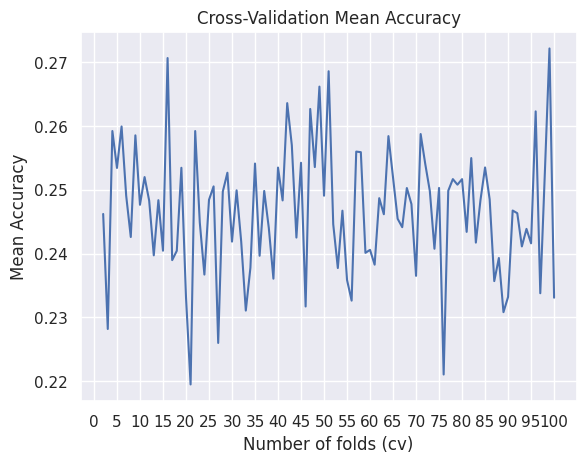

In [18]:
# con questo codice andiamo a cercare di ottimizzare la cross-validation
list_cv = range(2,101) # questo esperimento è stato condotto con 30, 100, 300 fold che sono stati documentati
evaluate_classifiers_with_plot(list_cv, classifier_model, X, y, 5)

#### Conclusioni sul random forest
Non sembrano esserci grossi cambiamenti quello che notiamo perà e che il random forest tende ad essere più stabile degli alberi e si stabilizza maggiormente nell'intervallo che oscilla tra una accurancy di [24,26].

Ora proviamo ancora un altro modello di ensemble learning basato sugli alberi decisionali e in particolare che utilizza ancora la tecnica del Bagging ovvero Bootstrap aggregating.

In [9]:
from sklearn.ensemble import ExtraTreesClassifier

# istanzia un modello di classificatore Extra Trees
clf_ExT = ExtraTreesClassifier()

# usiamo la cross-val
scores_ExT = cross_val_score(clf_ExT, X, y, cv=10)
mean_accurancy_ExT = scores_ExT.mean()
print("Accurancy su ogni ciclo della cross-validation:\n", scores_ExT)
print("Accurancy mediata su i 10 fold fatti:", mean_accurancy_ExT)

Accurancy su ogni ciclo della cross-validation:
 [0.21582734 0.24460432 0.25179856 0.28776978 0.23021583 0.15217391
 0.23913043 0.24637681 0.30434783 0.23188406]
Accurancy mediata su i 10 fold fatti: 0.24041288708163905


In [12]:
# Andiamo a testaare il modello di Extra trees sui principali valori di cross_val
clf_ET = [ExtraTreesClassifier]
evaluate_classifiers(values, clf_ET, X, y)

Classifier: <class 'sklearn.ensemble._forest.ExtraTreesClassifier'>
CV: 5
Mean Accuracy: 0.25198555956678703
Scores: [0.2166065  0.25270758 0.27436823 0.2599278  0.25631769]
__________________________________________________________________________
##########################################################################
 
CV: 10
Mean Accuracy: 0.25489000104264414
Scores: [0.21582734 0.23021583 0.28057554 0.28057554 0.24460432 0.26811594
 0.23913043 0.26086957 0.30434783 0.22463768]
__________________________________________________________________________
##########################################################################
 
CV: 15
Mean Accuracy: 0.2555867227676485
Scores: [0.27956989 0.17204301 0.25806452 0.34408602 0.23655914 0.27173913
 0.27173913 0.32608696 0.16304348 0.29347826 0.29347826 0.18478261
 0.22826087 0.27173913 0.23913043]
__________________________________________________________________________
##################################################################

Classifier: <class 'sklearn.ensemble._forest.ExtraTreesClassifier'>
CV: 2
Mean Accuracy: 0.2613625937325359
Scores: [0.27417027 0.24855491]
__________________________________________________________________________
##########################################################################
 
CV: 3
Mean Accuracy: 0.24908051697639552
Scores: [0.24675325 0.27489177 0.22559653]
__________________________________________________________________________
##########################################################################
 
CV: 4
Mean Accuracy: 0.25558253235828154
Scores: [0.27377522 0.27456647 0.23121387 0.24277457]
__________________________________________________________________________
##########################################################################
 
CV: 5
Mean Accuracy: 0.23465703971119134
Scores: [0.22021661 0.24187726 0.22382671 0.23465704 0.25270758]
__________________________________________________________________________
############################################

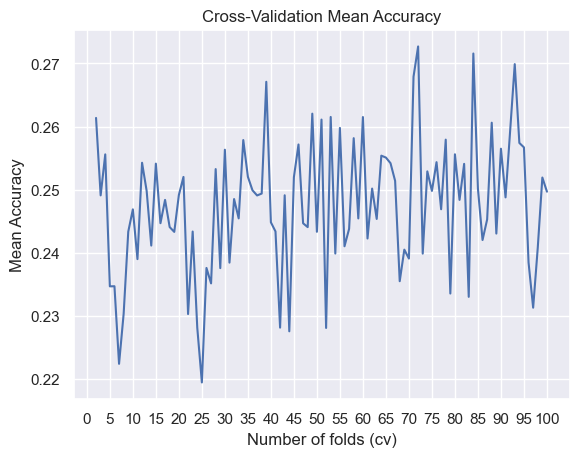

In [24]:
# con questo codice andiamo a cercare di ottimizzare la cross-validation
# questo esperimento è stato condotto solo con 30 e non con 100 o 300 data l'impiegno computazionale
# che è stato osservato nel random forest ovvero 1 ora di computazione per fornire i risultati con 100
evaluate_classifiers_with_plot(range(2,101), [ExtraTreesClassifier], X, y, 5)

#### Conclusioni sul Extra Trees


### Metodi di boosting
 Dopo aver visto in azione un modello di ensemble che sfrutta la tecnica del Bagging proviamo a vedere qual'è il comportamento di un esemble model che sfrutti la tecnica del boosting.

Nel boosting ogni modello viene costruito in modo sequenziale in base agli errori del modello precedente.

Dei dati vengono forniti al primo classificatore, il quale effettua una prediction. Nel classificatore successivo viene dato più peso alle istanze classificate in modo sbagliate. In questo modo l’enfasi viene posta sugli errori dei classificatori precedenti.

Alla base di questo algoritmo sta il fatto di formare un certo numero di classificatori deboli che, imparando dagli errori dei precedenti e in molte iterazioni, si trasformano in un classificatore forte.

In [7]:
from sklearn.ensemble import AdaBoostClassifier

# Istanziazione di un modello ada boost
clf_AdaB = AdaBoostClassifier(n_estimators=50, random_state=42)

# usiamo la cross-val
scores_AB = cross_val_score(clf_AdaB, X, y, cv=10)
mean_accurancy_AB = scores_AB.mean()
print("Accurancy su ogni ciclo della cross-validation:\n", scores_AB)
print("Accurancy mediata su i 10 fold fatti:", mean_accurancy_AB)

Accurancy su ogni ciclo della cross-validation:
 [0.24460432 0.1942446  0.27338129 0.25899281 0.22302158 0.24637681
 0.1884058  0.20289855 0.24637681 0.22463768]
Accurancy mediata su i 10 fold fatti: 0.23029402564904605


In [15]:
# proviamo adaboost sui  principali valori di folds per la cross_validation
clf_nodA =[AdaBoostClassifier]
evaluate_classifiers(values, clf_nodA, X, y)

Classifier: <class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>
CV: 5
Mean Accuracy: 0.2267148014440433
Scores: [0.23826715 0.23465704 0.22743682 0.18050542 0.25270758]
__________________________________________________________________________
##########################################################################
 
CV: 10
Mean Accuracy: 0.23029402564904605
Scores: [0.24460432 0.1942446  0.27338129 0.25899281 0.22302158 0.24637681
 0.1884058  0.20289855 0.24637681 0.22463768]
__________________________________________________________________________
##########################################################################
 
CV: 15
Mean Accuracy: 0.23744740532959327
Scores: [0.1827957  0.23655914 0.31182796 0.32258065 0.2688172  0.2826087
 0.2173913  0.18478261 0.20652174 0.15217391 0.20652174 0.17391304
 0.23913043 0.27173913 0.30434783]
__________________________________________________________________________
############################################################

Classifier: <class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>
CV: 2
Mean Accuracy: 0.2151636096722802
Scores: [0.21356421 0.21676301]
__________________________________________________________________________
##########################################################################
 
CV: 3
Mean Accuracy: 0.21733448523036372
Scores: [0.21212121 0.21428571 0.22559653]
__________________________________________________________________________
##########################################################################
 
CV: 4
Mean Accuracy: 0.22743249321184056
Scores: [0.23342939 0.24277457 0.19653179 0.23699422]
__________________________________________________________________________
##########################################################################
 
CV: 5
Mean Accuracy: 0.2267148014440433
Scores: [0.23826715 0.23465704 0.22743682 0.18050542 0.25270758]
__________________________________________________________________________
######################################

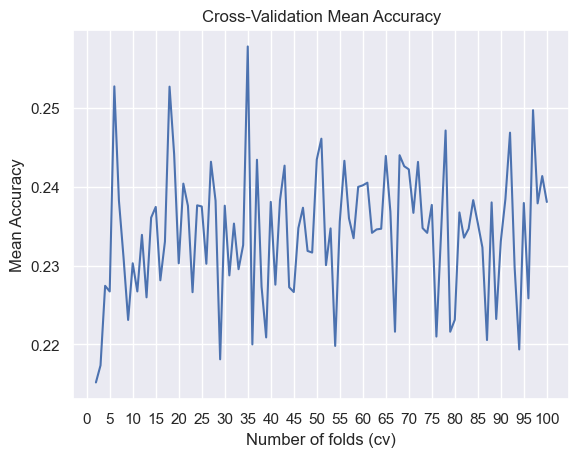

In [9]:
# ottimizziamo il k per effettuare il fold della cross_validation
evaluate_classifiers_with_plot(range(2,101), [AdaBoostClassifier], X, y, 5)


#### Conclusioni sul Ada Boost
Questo modello di ensemble è stato meno performante dei modelli con Bagging infatti presenta oscillazioni più basse e un range di varianza inferiore ai preceddenti e come si vede dal grafico solo 2 pichi sopra il 25% di accurancy il resto tende a non superare il 24%.

In [12]:
# applichiamo un trasformer sulla feature target in quanto il modello che andremo
# ad usare necessita di tale trasformazione
def transform_column(column):
    new_column = np.where(column == 1, 0, column)
    new_column = np.where(column == 2, 1, new_column)
    new_column = np.where(column == 3, 2, new_column)
    new_column = np.where(column == 4, 3, new_column)
    return new_column

# Esempio di utilizzo
series_y_enc = df['Baselinehistological staging']
list_y_enc = series_y_enc.values
y_enc = transform_column(list_y_enc)

print("Colonna originale:", list_y_enc)
print("Nuova colonna trasformata:", y_enc)

Colonna originale: [2 2 4 ... 2 3 3]
Nuova colonna trasformata: [1 1 3 ... 1 2 2]


In [10]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Istanziazione di un modello di esemble di tipo XGBoosting
clf_xgb = XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)

# usiamo la cross-val
scores_xgb = cross_val_score(clf_xgb, X, y_enc, cv=10)
mean_accurancy_xgb = scores_xgb.mean()
print("Accurancy su ogni ciclo della cross-validation:\n", scores_xgb)
print("Accurancy mediata su i 10 fold fatti:", mean_accurancy_xgb)


Accurancy su ogni ciclo della cross-validation:
 [0.27338129 0.25179856 0.30935252 0.23021583 0.26618705 0.19565217
 0.17391304 0.16666667 0.23188406 0.19565217]
Accurancy mediata su i 10 fold fatti: 0.229470336774059


In [20]:
# proviamo XGBoost sui  principali valori di folds per la cross_validation
clf_XB =[XGBClassifier]
evaluate_classifiers(values, clf_XB, X, y_enc)

Classifier: <class 'xgboost.sklearn.XGBClassifier'>
CV: 5
Mean Accuracy: 0.23971119133574006
Scores: [0.24548736 0.27075812 0.21299639 0.20938628 0.2599278 ]
__________________________________________________________________________
##########################################################################
 
CV: 10
Mean Accuracy: 0.229470336774059
Scores: [0.27338129 0.25179856 0.30935252 0.23021583 0.26618705 0.19565217
 0.17391304 0.16666667 0.23188406 0.19565217]
__________________________________________________________________________
##########################################################################
 
CV: 15
Mean Accuracy: 0.24179523141654977
Scores: [0.27956989 0.24731183 0.30107527 0.29032258 0.20430108 0.29347826
 0.32608696 0.23913043 0.16304348 0.25       0.23913043 0.17391304
 0.20652174 0.18478261 0.22826087]
__________________________________________________________________________
##########################################################################
 
CV: 20

Classifier: <class 'xgboost.sklearn.XGBClassifier'>
CV: 2
Mean Accuracy: 0.24982379534402654
Scores: [0.24386724 0.25578035]
__________________________________________________________________________
##########################################################################
 
CV: 3
Mean Accuracy: 0.239711963139295
Scores: [0.23376623 0.24458874 0.24078091]
__________________________________________________________________________
##########################################################################
 
CV: 4
Mean Accuracy: 0.25342739584547985
Scores: [0.25648415 0.26011561 0.24855491 0.24855491]
__________________________________________________________________________
##########################################################################
 
CV: 5
Mean Accuracy: 0.23971119133574006
Scores: [0.24548736 0.27075812 0.21299639 0.20938628 0.2599278 ]
__________________________________________________________________________
#############################################################

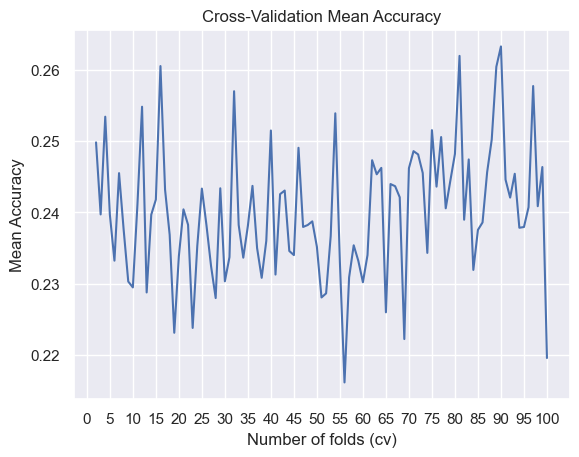

In [14]:
# ottimizziamo il k per effettuare il fold della cross_validation
evaluate_classifiers_with_plot(range(2,101), [XGBClassifier], X, y_enc, 5)


#### Conclusioni su XGBoost
Anche per lo XGBoost le performance non cambiano di molto anche se sembra comportarsi meglio dell'ADAboost infatti riesce a toccare picchi di 26% di accurancy. Sembra che aumentando il numero di fold in particolare dopo aver superato i 17 le performance tendono a calare sotto il 24% di accurancy. Ad ogni modo restiamo sempre su modelli inefficaci per il task che ci siamo posti.

In [15]:
from sklearn.ensemble import GradientBoostingClassifier

# istanziazione del modello classificatore Gradient Boosting
clf_GrB = GradientBoostingClassifier()

# usiamo la cross-val
scores_GrB = cross_val_score(clf_GrB, X, y, cv=10)
mean_accurancy_GrB = scores_GrB.mean()
print("Accurancy su ogni ciclo della cross-validation:\n", scores_GrB)
print("Accurancy mediata su i 10 fold fatti:", mean_accurancy_GrB)

Accurancy su ogni ciclo della cross-validation:
 [0.23741007 0.25899281 0.21582734 0.27338129 0.23021583 0.26086957
 0.20289855 0.21014493 0.24637681 0.2173913 ]
Accurancy mediata su i 10 fold fatti: 0.23535084975497864


In [22]:
# proviamo gradient boosting sui  principali valori di folds per la cross_validation
clf_GrB =[GradientBoostingClassifier]
evaluate_classifiers(values, clf_GrB, X, y)

Classifier: <class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
CV: 5
Mean Accuracy: 0.23610108303249094
Scores: [0.24548736 0.24909747 0.23104693 0.21299639 0.24187726]
__________________________________________________________________________
##########################################################################
 
CV: 10
Mean Accuracy: 0.22958502763006988
Scores: [0.20863309 0.27338129 0.20143885 0.27338129 0.21582734 0.24637681
 0.20289855 0.21014493 0.24637681 0.2173913 ]
__________________________________________________________________________
##########################################################################
 
CV: 15
Mean Accuracy: 0.21660433224248088
Scores: [0.19354839 0.25806452 0.21505376 0.2688172  0.15053763 0.23913043
 0.31521739 0.26086957 0.22826087 0.17391304 0.20652174 0.15217391
 0.22826087 0.15217391 0.20652174]
__________________________________________________________________________
###############################################################

Classifier: <class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
CV: 2
Mean Accuracy: 0.23682010025940664
Scores: [0.24098124 0.23265896]
____________________________________________________________
############################################################
 
CV: 3
Mean Accuracy: 0.22816951667277044
Scores: [0.2034632  0.23809524 0.24295011]
____________________________________________________________
############################################################
 
CV: 4
Mean Accuracy: 0.23250903699755124
Scores: [0.2074928  0.23121387 0.25144509 0.23988439]
____________________________________________________________
############################################################
 
CV: 5
Mean Accuracy: 0.23898916967509024
Scores: [0.24548736 0.25270758 0.23104693 0.21299639 0.25270758]
____________________________________________________________
############################################################
 
CV: 6
Mean Accuracy: 0.23468536294623252
Scores: [0.2034632  0.22077922 0.25

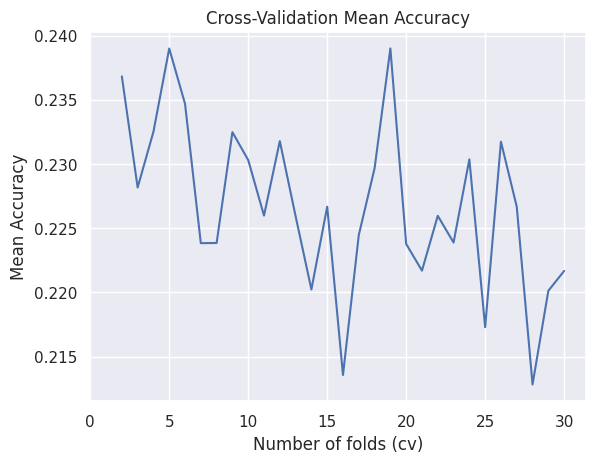

In [43]:
# ottimizziamo gradient boosting sul parametro k per effettuare il fold della cross_validation
evaluate_classifiers_with_plot(range(2,31), clf_GrB, X, y, 5)


#### Conclusioni sul Gradient Boost
Quest'ultimo metodo di esemble basato sul boosting sembra essere il peggiore di tutti quelli utilizza anche per lui scarse performance che non superano il 24% di accurancy.